# Soccer Mining League
## Predict result one league and one season

#### Data Mining PESC/COPPE/UFRJ
#### Required: Python 3.5, Numpy, Scikit-Learn, Matplotlib

In [40]:
import numpy as np

#Sklearn -- preprocessing 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Plots
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score
from sklearn import manifold

from sklearn.tree import DecisionTreeClassifier

# Soccer Mining League Functions
from functions import *

## Reading dataset

#### Reading from file

In [2]:
trainTest = np.loadtxt("../dataset/formated_files/matchs_teams_players_germany_league_2015_2016_formated.csv",delimiter=",")

#### Recover output

In [3]:
outputs = trainTest[:,907]
outputsR = trainTest[:,[908,909]]


## Preprocessing

#### Plot PCA Expectrum for Tatics  (One Team)

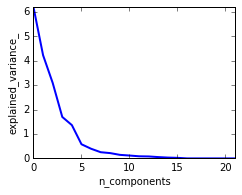

In [4]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeTatics)

#### Plot PCA Expectrum for team rating (One Team)

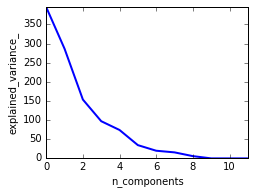

In [5]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
plotPCASpectrum(homeRateTeam)

#### Plot PCA Expectrum for one Player

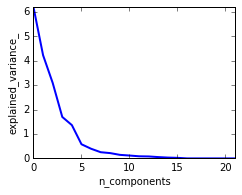

In [6]:
homeRateTeam = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeRateTeam)

#### Plot PCA Expectrum for all Collumn

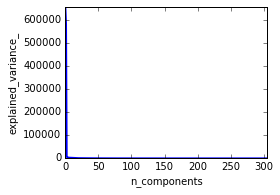

In [7]:
plotPCASpectrum(trainTest[:,:907])

#### Reducing Dimensionality for Tatics

In [8]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
awayTatics = trainTest[:,[14,15,16,17,18,19,20,21,22,23,24,36,37,38,39,40,41,42,43,44,45,46]]

pca = decomposition.PCA(n_components=5)
homeTaticspreprocessed = pca.fit_transform(homeTatics)

pca = decomposition.PCA(n_components=5)
awayTaticspreprocessed = pca.fit_transform(awayTatics)

#### Reducing Dimensionality for team ratings

In [9]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = trainTest[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Plot Teams

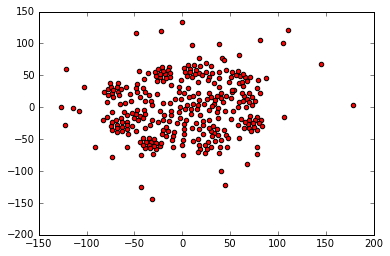

In [47]:
teamsPlot = TSNE(n_components=2).fit_transform(homeRateTeamPreprocessed)


plt.scatter(teamsPlot[:,0], teamsPlot[:,1], c='r', marker='o')
plt.show()

#### Reducing Dimensionality for players

In [46]:
xTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((trainTest[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]


#### Plot players

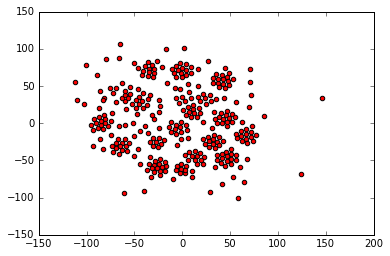

In [45]:
playersRDPlot = TSNE(n_components=2).fit_transform(playersRD[0])


plt.scatter(playersRDPlot[:,0], playersRDPlot[:,1], c='r', marker='o')
plt.show()

#### Maximize sparse teams

In [11]:
enc = preprocessing.OneHotEncoder()
enc.fit(trainTest[:,[0]])
teamsH = enc.transform(trainTest[:,[0]]) 
teamsA = enc.transform(trainTest[:,[1]]) 
teams = (teamsH + teamsA).toarray()

#### Concatenate inputs

In [12]:
date = trainTest[:,[2]]
inputs = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed), axis=1)

for playerRD in playersRD:
    inputs = np.concatenate((inputs,playerRD), axis=1)



#### Scaling inputs

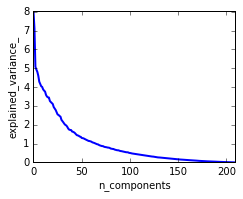

In [13]:
inputs = StandardScaler().fit_transform(inputs)
plotPCASpectrum(inputs)

#### Using ....

In [14]:
inputs = np.concatenate((inputs,teams), axis=1)

#### Input Version PCA for every collumn 

In [15]:
pca = decomposition.PCA(n_components=20)
inputsPCA = pca.fit_transform(np.concatenate((trainTest[:,:907],teams),axis=1))
inputsPCA = StandardScaler().fit_transform(inputsPCA)

## Classification 

#### Using KFold with Naive Bayes

Naive Bayes: = Score:4.59e-01[+/- 4.81e-02]


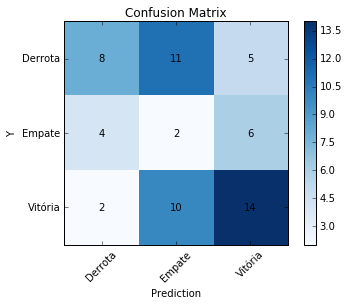

In [16]:
resultSVM = KFoldNB(inputs,outputs)

gnb = GaussianNB()
np.mean(cross_val_score(gnb, inputs, outputs, scoring='accuracy', cv=10))
holdoutPlotConfusionMatrix(gnb,inputs,outputs)

#### Using KFold with SVM (PCA for every collumn )

0.483434139785


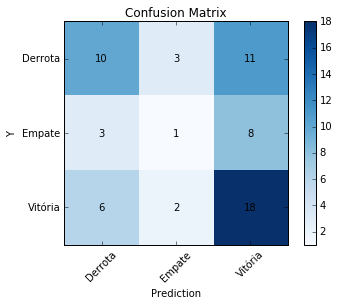

In [17]:
clf = svm.SVC()
print(np.mean(cross_val_score(clf,inputsPCA,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputsPCA,outputs)

#### Using KFold with SVM 

In [18]:
def executeKFold(gammaCLF = 1,CCLF = 1,kernelCLF="poly"):
    clf = svm.SVC(gamma=gammaCLF,C=CCLF,kernel=kernelCLF)
    print(str(gammaCLF) + ", " + str(CCLF) + ", " + kernelCLF + ": " + str(np.mean(cross_val_score(clf,inputs,outputs,cv=10))) + "\n")

    
gammas = [0.1,1,2,4,8,10,12,14,16,"auto"]
cs = [0.1,1,2,4,8,10,12,14,16]
#[[executeKFold(gamma,c,"linear")for c in cs] for gamma in gammas]
#np.mean(cross_val_score(svm.SVC(coef0=1,kernel="sigmoid"),inputs,outputs,cv=10))

0.532701612903


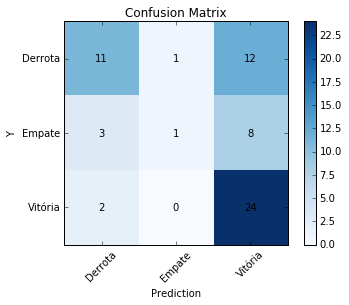

In [19]:
clf = svm.SVC()
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using KFold with Logistic Regression

0.493010752688


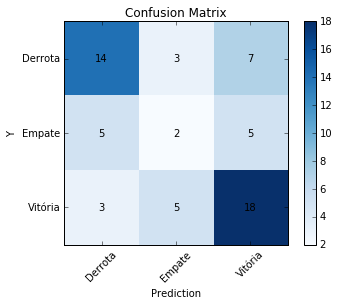

In [20]:
clf = LogisticRegression(penalty='l1')
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using KFold with KNeighborsClassifier

0.520315860215


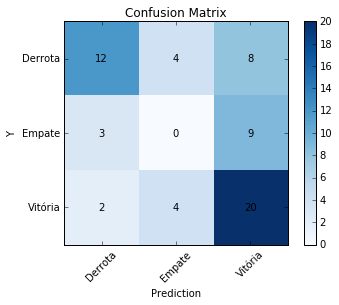

In [21]:
clf = KNeighborsClassifier(n_neighbors=15)
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using SVM - Regression for predict number of goals before predict winning team

In [22]:
clf = svm.SVR()
KFoldRC(clf,inputs,outputsR)

 = Score:5.58e-01[+/- 8.61e-02]


0.55784946236559141

0.408790322581


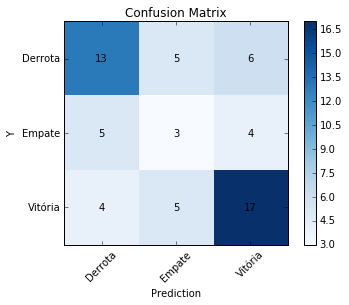

In [33]:
clf = DecisionTreeClassifier(max_features =180)
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)